<a href="https://colab.research.google.com/github/Neerajshukla235/Booking.com_model/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv('/content/Data_Science_Internship - Dump.csv')

In [3]:
df.head()

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46608 entries, 0 to 46607
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      46608 non-null  int64 
 1   Agent_id        46608 non-null  object
 2   status          46608 non-null  object
 3   lost_reason     43244 non-null  object
 4   budget          42908 non-null  object
 5   lease           44267 non-null  object
 6   movein          32970 non-null  object
 7   source          46608 non-null  object
 8   source_city     46608 non-null  object
 9   source_country  46608 non-null  object
 10  utm_source      46608 non-null  object
 11  utm_medium      46608 non-null  object
 12  des_city        46608 non-null  object
 13  des_country     46608 non-null  object
 14  room_type       23061 non-null  object
 15  lead_id         46608 non-null  object
dtypes: int64(1), object(15)
memory usage: 5.7+ MB


In [5]:
df.shape

(46608, 16)

In [6]:
df.columns

Index(['Unnamed: 0', 'Agent_id', 'status', 'lost_reason', 'budget', 'lease',
       'movein', 'source', 'source_city', 'source_country', 'utm_source',
       'utm_medium', 'des_city', 'des_country', 'room_type', 'lead_id'],
      dtype='object')

In [7]:
df_selected=df[['status', 'lost_reason','budget','lease','room_type']]

In [8]:
df_selected.head()

,status,lost_reason,budget,lease,room_type
0,LOST,Not responding,NaN,NaN,NaN
1,LOST,Low budget,NaN,NaN,NaN
2,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,Ensuite
3,LOST,Low budget,0-0,0,NaN
4,LOST,Junk lead,NaN,NaN,NaN


In [9]:
df_selected['status'].value_counts()

LOST           43244
WON             3073
OPPORTUNITY      254
CONTACTED         28
PROCESSING         8
IMPORTANT          1
Name: status, dtype: int64

In [10]:
df_selected.isnull().sum()/len(df_selected) * 100

status          0.000000
lost_reason     7.217645
budget          7.938551
lease           5.022743
room_type      50.521370
dtype: float64

In [11]:
df_selected['room_type'].value_counts()

Ensuite         12477
Studio           6383
Entire Place     4198
Non-Ensuite         2
Twin-Studio         1
Name: room_type, dtype: int64

In [12]:
df_selected['room_type'].mode()[0]

'Ensuite'

In [13]:
df_selected['room_type'].fillna("not_define",inplace=True)
df_selected['lost_reason'].fillna("not_define",inplace=True)
df_selected['lease'].fillna("not_define",inplace=True)


In [14]:
df_selected['room_type'].value_counts()

not_define      23547
Ensuite         12477
Studio           6383
Entire Place     4198
Non-Ensuite         2
Twin-Studio         1
Name: room_type, dtype: int64

In [15]:
df_selected.isnull().sum()/len(df_selected) * 100

status         0.000000
lost_reason    0.000000
budget         7.938551
lease          0.000000
room_type      0.000000
dtype: float64

In [16]:
df_selected['status'].value_counts()

LOST           43244
WON             3073
OPPORTUNITY      254
CONTACTED         28
PROCESSING         8
IMPORTANT          1
Name: status, dtype: int64

In [17]:
df_selected.dropna(inplace=True)

In [18]:
df_selected.isnull().sum()/len(df_selected) * 100

status         0.0
lost_reason    0.0
budget         0.0
lease          0.0
room_type      0.0
dtype: float64

In [19]:
df_selected['status'].value_counts()

LOST           39629
WON             2994
OPPORTUNITY      248
CONTACTED         28
PROCESSING         8
IMPORTANT          1
Name: status, dtype: int64

In [20]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42908 entries, 2 to 46607
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   status       42908 non-null  object
 1   lost_reason  42908 non-null  object
 2   budget       42908 non-null  object
 3   lease        42908 non-null  object
 4   room_type    42908 non-null  object
dtypes: object(5)
memory usage: 2.0+ MB


In [21]:
df_selected['budget'].value_counts()

£60 - £120 Per week     9862
£121 - £180 Per Week    8954
0-0                     5733
£181 - £240 Per Week    2171
100                     1516
                        ... 
0-80-100$                  1
0-235                      1
£120-160 Per Week          1
1400 per month             1
0-500 PCM                  1
Name: budget, Length: 1857, dtype: int64

In [22]:
df_selected['min_budget']=df_selected['budget'].str[:5]

In [23]:
df_selected['min_budget'].value_counts()

£60 -    9868
£121     8963
0-0      5733
£181     2172
100      1516
         ... 
500 e       1
1400        1
250 P       1
240-2       1
400 P       1
Name: min_budget, Length: 1205, dtype: int64

In [24]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42908 entries, 2 to 46607
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   status       42908 non-null  object
 1   lost_reason  42908 non-null  object
 2   budget       42908 non-null  object
 3   lease        42908 non-null  object
 4   room_type    42908 non-null  object
 5   min_budget   42908 non-null  object
dtypes: object(6)
memory usage: 2.3+ MB


In [25]:
df_selected['budget']

2        £121 - £180 Per Week
3                         0-0
5                         120
6                         0-0
7        £181 - £240 Per Week
                 ...         
46603     £60 - £120 Per week
46604     £60 - £120 Per week
46605    £241 - £300 Per week
46606                    1108
46607    £181 - £240 Per Week
Name: budget, Length: 42908, dtype: object

In [26]:
df_selected['max_budget']=df_selected['budget'].str[-13:]

In [27]:
df_selected['status'].value_counts()

LOST           39629
WON             2994
OPPORTUNITY      248
CONTACTED         28
PROCESSING         8
IMPORTANT          1
Name: status, dtype: int64

In [28]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42908 entries, 2 to 46607
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   status       42908 non-null  object
 1   lost_reason  42908 non-null  object
 2   budget       42908 non-null  object
 3   lease        42908 non-null  object
 4   room_type    42908 non-null  object
 5   min_budget   42908 non-null  object
 6   max_budget   42908 non-null  object
dtypes: object(7)
memory usage: 2.6+ MB


In [29]:
df_selected['budget'].unique()

array(['£121 - £180 Per Week', '0-0', '120', ..., '400 Per Week',
       '0-115 or 120', '0-500 PCM'], dtype=object)

In [30]:
df_selected['max_budget'].unique()

array(['£180 Per Week', '0-0', '120', ..., '400 Per Week', '0-115 or 120',
       '0-500 PCM'], dtype=object)

In [31]:
df_selected.drop(['budget'],inplace=True,axis=1)

In [32]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42908 entries, 2 to 46607
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   status       42908 non-null  object
 1   lost_reason  42908 non-null  object
 2   lease        42908 non-null  object
 3   room_type    42908 non-null  object
 4   min_budget   42908 non-null  object
 5   max_budget   42908 non-null  object
dtypes: object(6)
memory usage: 2.3+ MB


In [33]:
from sklearn import preprocessing
lebelencoder=preprocessing.LabelEncoder()

In [34]:
df_selected['status']=lebelencoder.fit_transform(df_selected['status'])
df_selected['lost_reason']=lebelencoder.fit_transform(df_selected['lost_reason'])
df_selected['lease']=lebelencoder.fit_transform(df_selected['lease'])
df_selected['room_type']=lebelencoder.fit_transform(df_selected['room_type'])
df_selected['min_budget']=lebelencoder.fit_transform(df_selected['min_budget'])
df_selected['max_budget']=lebelencoder.fit_transform(df_selected['max_budget'])


In [35]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42908 entries, 2 to 46607
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   status       42908 non-null  int64
 1   lost_reason  42908 non-null  int64
 2   lease        42908 non-null  int64
 3   room_type    42908 non-null  int64
 4   min_budget   42908 non-null  int64
 5   max_budget   42908 non-null  int64
dtypes: int64(6)
memory usage: 2.3 MB


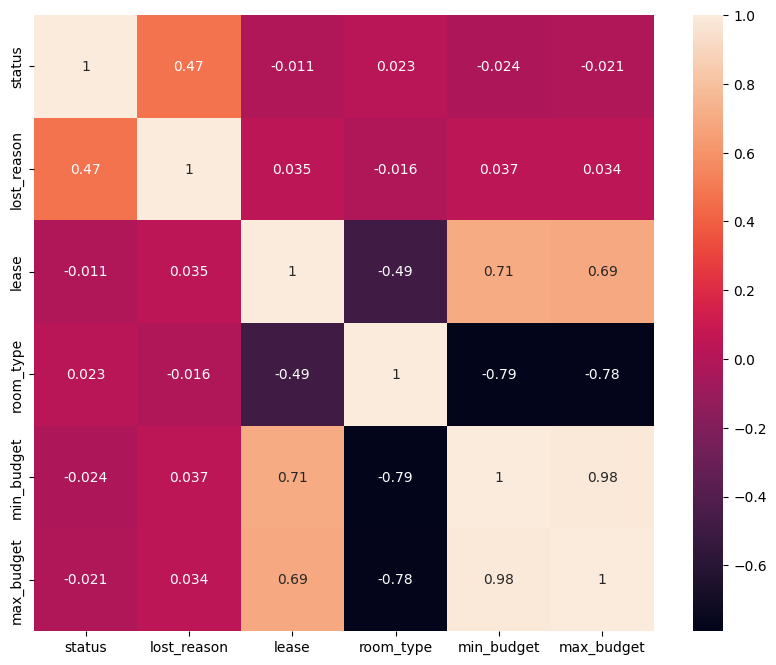

In [36]:
Corr = df_selected.corr()
plt.figure(figsize=(10,8))
sns.heatmap(Corr, annot=True)
plt.show()

<Axes: ylabel='Density'>

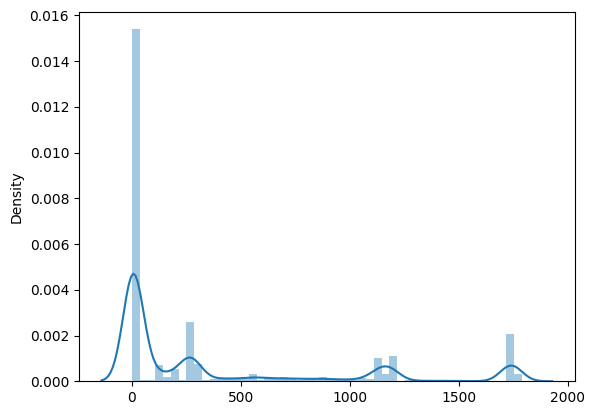

In [37]:
sns.distplot(df_selected)

<Axes: xlabel='status', ylabel='Density'>

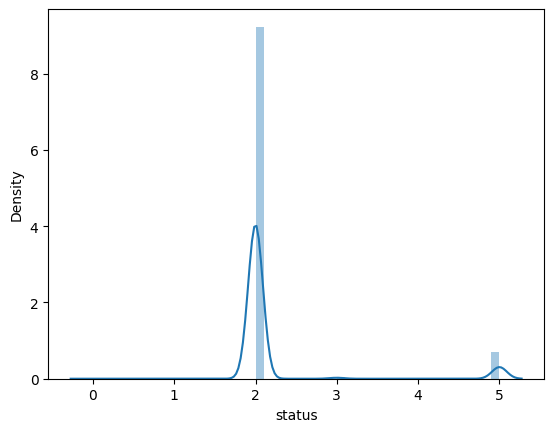

In [38]:
sns.distplot(df_selected['status'])

In [39]:
df_selected['status'].value_counts()

2    39629
5     2994
3      248
0       28
4        8
1        1
Name: status, dtype: int64

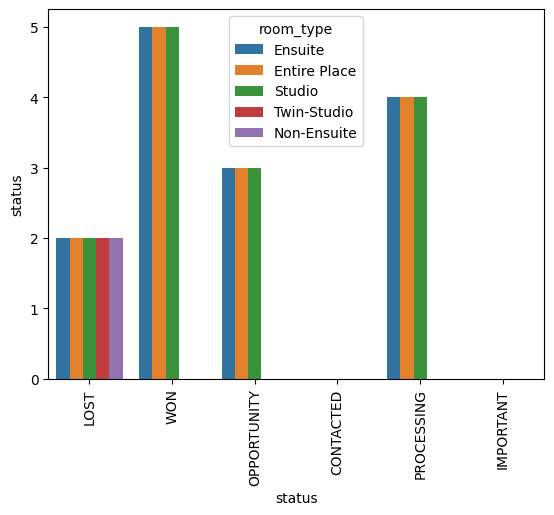

In [40]:
sns.barplot(y=df_selected['status'],x=df['status'],hue=df['room_type'])
plt.xticks(rotation=90)
plt.show()

In [41]:
x=df_selected.drop(['status'],axis=1)
y=df_selected.status

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state = 42)

In [44]:
from sklearn.ensemble import AdaBoostClassifier

In [45]:
abc = AdaBoostClassifier(n_estimators=100, learning_rate=0.30, random_state=0)

In [46]:
model1 = abc.fit(X_train, y_train)

In [47]:
y_pred = model1.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
print("AdaBoost Classifier Model Accuracy:", accuracy_score(y_test, y_pred))


AdaBoost Classifier Model Accuracy: 0.9955721277091587


In [50]:
from sklearn.ensemble import VotingClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(random_state=0)
model2 = tree.DecisionTreeClassifier(random_state=0)
model3=RandomForestClassifier(random_state=0)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2),('rf',model3)], voting='hard')
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9938242833838267

In [51]:
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2),('rf',model3)], voting='soft')
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9948729899790258

In [52]:
from sklearn.metrics import classification_report, confusion_matrix

cf_ = classification_report(y_test, y_pred)
print(cf_)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           2       1.00      1.00      1.00      7939
           3       0.00      0.00      0.00        36
           5       0.94      1.00      0.97       605

    accuracy                           1.00      8582
   macro avg       0.49      0.50      0.49      8582
weighted avg       0.99      1.00      0.99      8582



In [53]:
confusion_matrix(y_test,y_pred)

array([[   0,    0,    0,    2],
       [   0, 7939,    0,    0],
       [   0,    0,    0,   36],
       [   0,    0,    0,  605]])

In [54]:
accuracy_score(y_test,y_pred)

0.9955721277091587

In [ ]:
'''LOST           39629
WON             2994
OPPORTUNITY      248
CONTACTED         28
PROCESSING         8
IMPORTANT          1'''

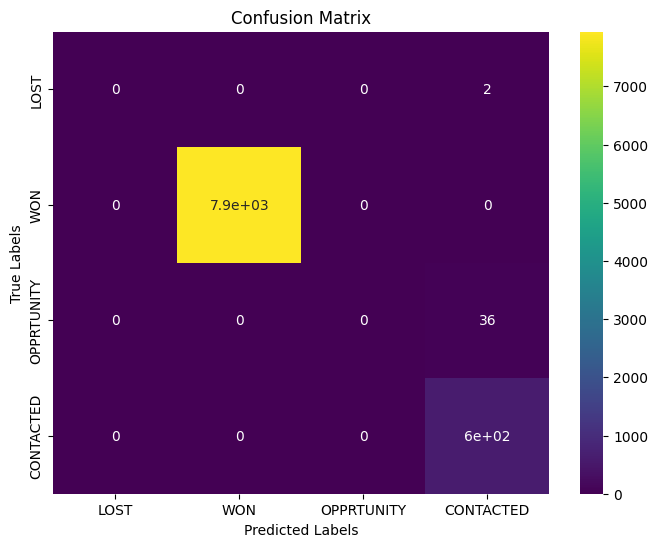

In [76]:

# Define class names and true labels
class_names = ['LOST', 'WON', 'OPPRTUNITY', 'CONTACTED']

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='viridis', xticklabels=class_names, yticklabels=class_names)

# Add axis labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show plot
plt.show()
